In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import plotly.express as px



In [2]:
df=pd.read_csv("Retail_Transactions_2000.csv")
df.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123


# Part A: Data Preprocessing Tasks

In [3]:
df.shape

(2000, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TransactionID    2000 non-null   object
 1   CustomerID       2000 non-null   object
 2   Gender           2000 non-null   object
 3   Age              2000 non-null   int64 
 4   City             2000 non-null   object
 5   ProductCategory  2000 non-null   object
 6   Quantity         2000 non-null   int64 
 7   Price            2000 non-null   int64 
 8   PurchaseDate     2000 non-null   object
 9   PaymentMode      2000 non-null   object
 10  TotalAmount      2000 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 172.0+ KB


In [5]:
df.describe()

,Age,Quantity,Price,TotalAmount
count,2000.000000,2000.000000,2000.00000,2000.000000
mean,44.679000,2.957000,2496.61000,7307.414500
std,15.179795,1.412143,1413.95187,5705.065758
min,18.000000,1.000000,100.00000,111.000000
25%,32.000000,2.000000,1239.00000,2756.250000
50%,45.000000,3.000000,2481.50000,5562.500000
75%,58.000000,4.000000,3695.50000,10751.250000
max,70.000000,5.000000,5000.00000,24950.000000


In [6]:
df.isnull().sum()

TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
# Unique values for categorical columns
print("\nUnique values in 'Gender':", df['Gender'].unique())
print("Unique values in 'City':", df['City'].unique())
print("Unique values in 'ProductCategory':", df['ProductCategory'].unique())
print("Unique values in 'PaymentMode':", df['PaymentMode'].unique())


Unique values in 'Gender': ['Female' 'Other' 'Male']
Unique values in 'City': ['Bengaluru' 'Pune' 'Hyderabad' 'Chennai' 'Delhi' 'Jaipur' 'Lucknow'
 'Ahmedabad' 'Kolkata' 'Mumbai']
Unique values in 'ProductCategory': ['Fashion' 'Books' 'Furniture' 'Groceries' 'Sports' 'Electronics' 'Beauty']
Unique values in 'PaymentMode': ['Cash' 'Card' 'Wallet' 'UPI']


In [9]:
df['Price'] = df['Price'].astype(float)

invalid_rows = df[(df['Quantity'] <= 0) | (df['Price'] <= 0) | (df['TotalAmount'] <= 0)]
print("Rows with negative or zero values BEFORE fixing:")
print(invalid_rows)

df.loc[df['Quantity'] <= 0, 'Quantity'] = df['Quantity'].median()
df.loc[df['Price'] <= 0, 'Price'] = df['Price'].median()


df['TotalAmount'] = df['Quantity'] * df['Price']


mismatch = df[df['TotalAmount'] != df['Quantity'] * df['Price']]
print("Rows with incorrect TotalAmount AFTER fixing:", mismatch.shape[0])


Rows with negative or zero values BEFORE fixing:
Empty DataFrame
Columns: [TransactionID, CustomerID, Gender, Age, City, ProductCategory, Quantity, Price, PurchaseDate, PaymentMode, TotalAmount]
Index: []
Rows with incorrect TotalAmount AFTER fixing: 0


In [10]:
df.drop(columns=['TransactionID'],inplace=True)

In [11]:
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])
df['Month'] = df['PurchaseDate'].dt.month
df['DayOfWeek'] = df['PurchaseDate'].dt.day_name()

bins = [0, 20, 30, 45, 60, np.inf]  # np.inf for 60+
labels = ['Teen', 'Young Adult', 'Adult', 'Senior', 'Elder']


df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)
df.head()

,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,Month,DayOfWeek,AgeGroup
0,C2824,Female,33,Bengaluru,Fashion,3,4479.0,2023-03-15,Cash,13437.0,3,Wednesday,Adult
1,C1409,Other,20,Pune,Books,5,1051.0,2023-01-22,Card,5255.0,1,Sunday,Teen
2,C5506,Other,47,Pune,Furniture,1,111.0,2023-04-18,Wallet,111.0,4,Tuesday,Senior
3,C5012,Other,21,Hyderabad,Groceries,5,2946.0,2023-08-09,Cash,14730.0,8,Wednesday,Young Adult
4,C4657,Female,41,Chennai,Sports,1,3123.0,2023-09-23,Wallet,3123.0,9,Saturday,Adult


In [12]:

categorical_cols = ['Gender', 'City', 'ProductCategory', 'PaymentMode', 'AgeGroup', 'DayOfWeek']
le = LabelEncoder()
for col in categorical_cols:
    df[col + '_Encoded'] = le.fit_transform(df[col])

numerical_cols = ['Age', 'Price', 'TotalAmount']
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.head()

,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,Month,DayOfWeek,AgeGroup,Gender_Encoded,City_Encoded,ProductCategory_Encoded,PaymentMode_Encoded,AgeGroup_Encoded,DayOfWeek_Encoded
0,C2824,Female,0.288462,Bengaluru,Fashion,3,0.893673,2023-03-15,Cash,0.536495,3,Wednesday,Adult,0,1,3,1,0,6
1,C1409,Other,0.038462,Pune,Books,5,0.194082,2023-01-22,Card,0.207094,1,Sunday,Teen,2,9,1,0,3,3
2,C5506,Other,0.557692,Pune,Furniture,1,0.002245,2023-04-18,Wallet,0.000000,4,Tuesday,Senior,2,9,4,3,2,5
3,C5012,Other,0.057692,Hyderabad,Groceries,5,0.580816,2023-08-09,Cash,0.588550,8,Wednesday,Young Adult,2,4,5,1,4,6
4,C4657,Female,0.442308,Chennai,Sports,1,0.616939,2023-09-23,Wallet,0.121261,9,Saturday,Adult,0,2,6,3,0,2


In [13]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
City                       0
ProductCategory            0
Quantity                   0
Price                      0
PurchaseDate               0
PaymentMode                0
TotalAmount                0
Month                      0
DayOfWeek                  0
AgeGroup                   0
Gender_Encoded             0
City_Encoded               0
ProductCategory_Encoded    0
PaymentMode_Encoded        0
AgeGroup_Encoded           0
DayOfWeek_Encoded          0
dtype: int64

In [14]:
df.to_csv("Retail_Cleaned.csv", index=False)


# Part B: Data Visualization Tasks

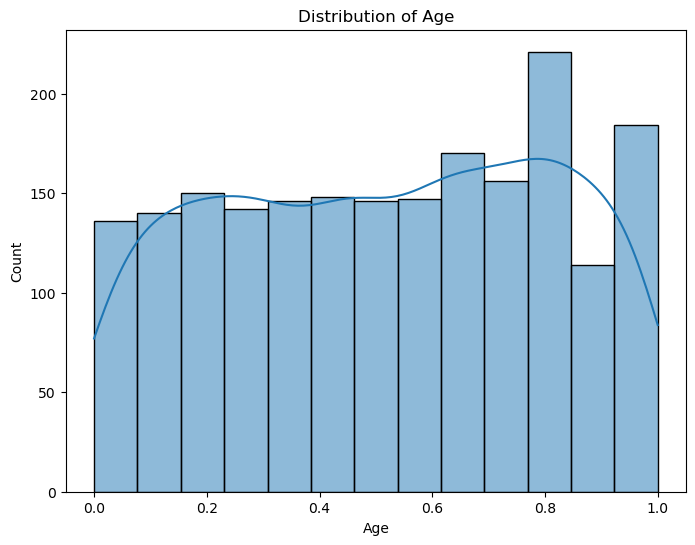

In [15]:
plt.figure(figsize=(8,6))
sns.histplot(df['Age'],kde=True)
plt.title("Distribution of Age")
plt.show()

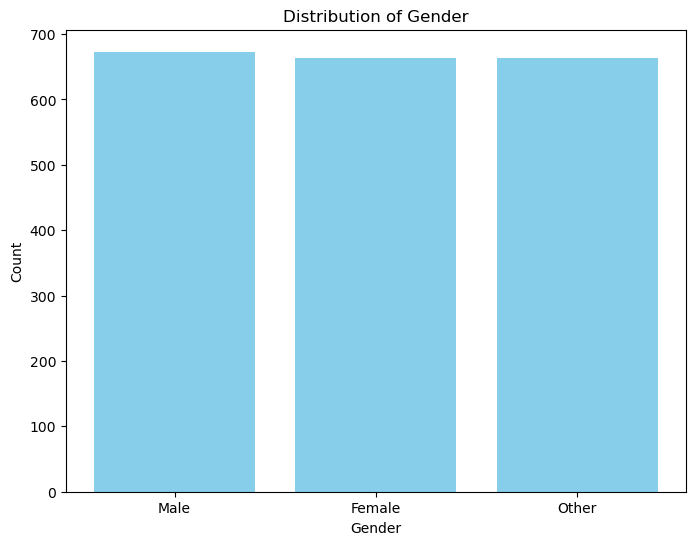

In [16]:
import matplotlib.pyplot as plt

gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8,6))
plt.bar(gender_counts.index, gender_counts.values, color='skyblue')
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


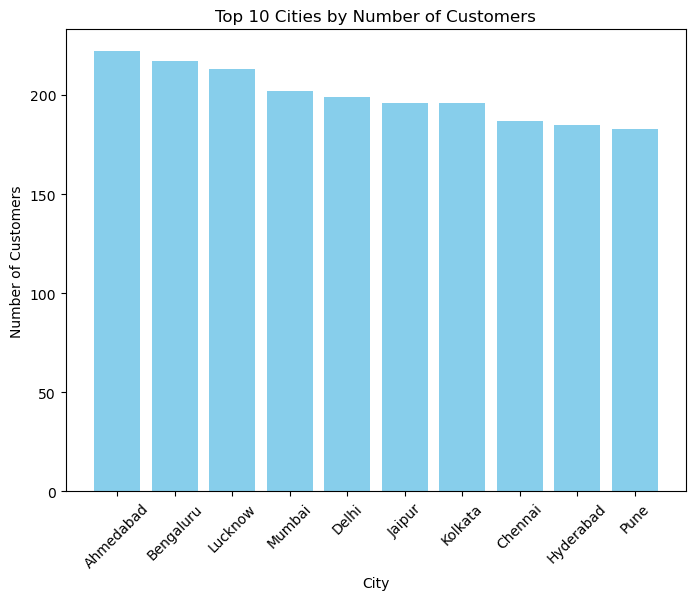

In [17]:

cities_count = df['City'].value_counts().head(10)

plt.figure(figsize=(8,6))
plt.bar(cities_count.index, cities_count.values, color='skyblue')
plt.title("Top 10 Cities by Number of Customers")
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


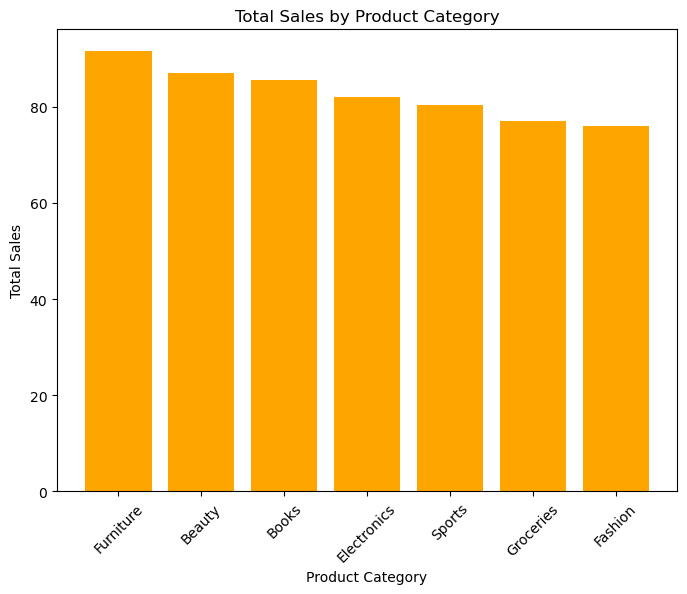

In [18]:


category_sales = df.groupby('ProductCategory')['TotalAmount'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.bar(category_sales.index, category_sales.values, color='orange')
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


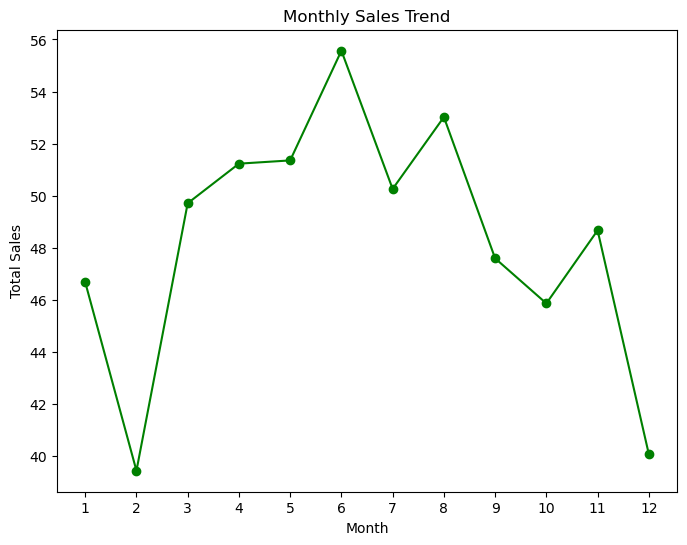

In [19]:
df['Month'] = df['PurchaseDate'].dt.month
monthly_sales = df.groupby('Month')['TotalAmount'].sum()

plt.figure(figsize=(8,6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='green')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(range(1,13))
plt.show()


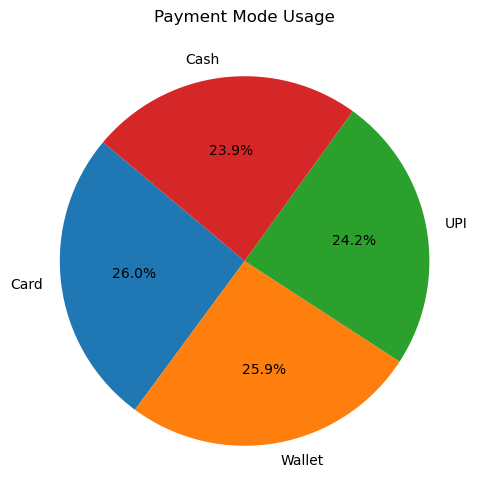

In [20]:
payment_counts = df['PaymentMode'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Payment Mode Usage")
plt.show()


C:\Users\manos\AppData\Local\Temp\ipykernel_21012\1674636826.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spend_age = df.groupby('AgeGroup')['TotalAmount'].mean()


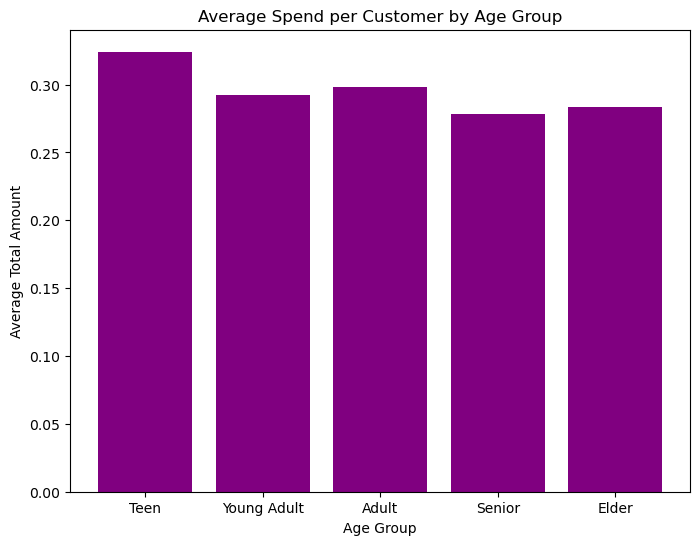

In [21]:
avg_spend_age = df.groupby('AgeGroup')['TotalAmount'].mean()

plt.figure(figsize=(8,6))
plt.bar(avg_spend_age.index, avg_spend_age.values, color='purple')
plt.title("Average Spend per Customer by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Total Amount")
plt.show()


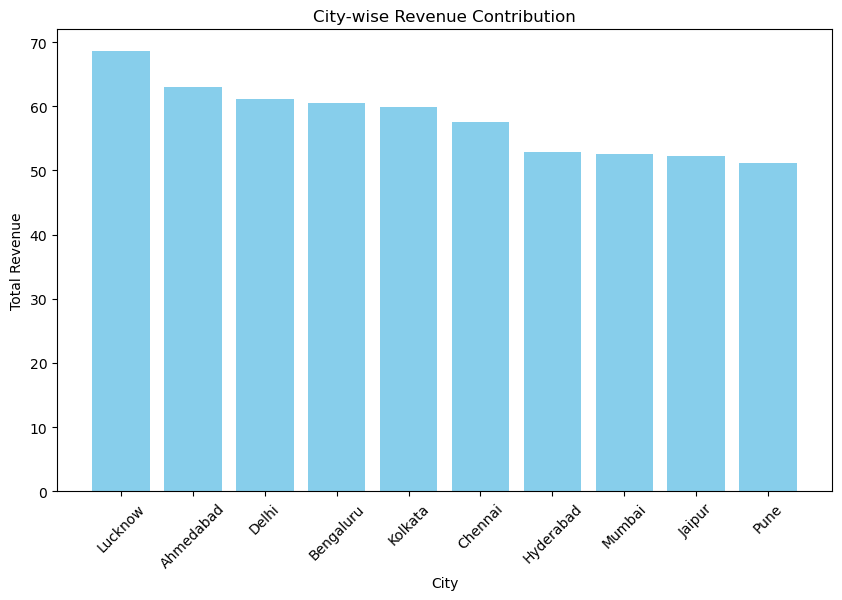

In [22]:
city_revenue = df.groupby('City')['TotalAmount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.bar(city_revenue.index, city_revenue.values, color='skyblue')
plt.title("City-wise Revenue Contribution")
plt.xlabel("City")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


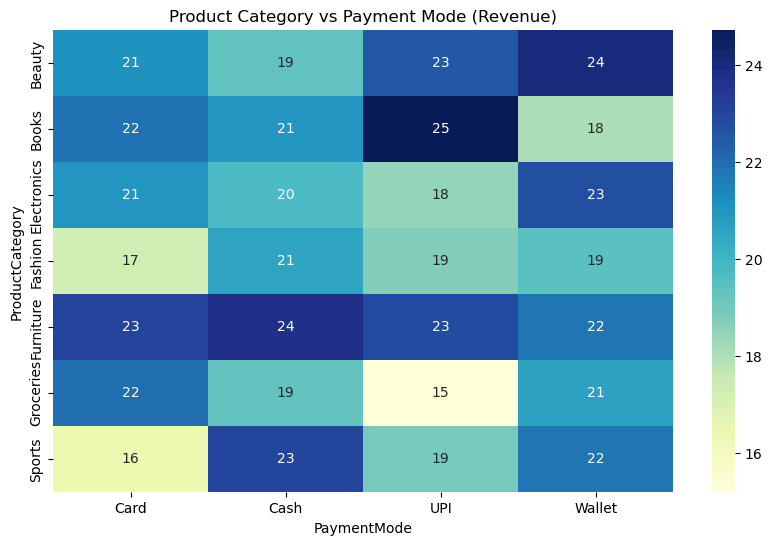

In [23]:
import seaborn as sns

heatmap_data = df.pivot_table(index='ProductCategory', columns='PaymentMode', values='TotalAmount', aggfunc='sum')

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("Product Category vs Payment Mode (Revenue)")
plt.show()


In [25]:
import plotly.express as px

fig = px.bar(df.groupby('ProductCategory')['TotalAmount'].sum().reset_index(), 
             x='ProductCategory', y='TotalAmount', title='Total Sales by Product Category')
fig.show()
